# Laboratorio 09, Regresion Lineal Multiple
### Water quality

#### Importamos las librerias necesarias

In [83]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

#### Cargamos los datos de waterQuality1.csv

In [84]:
data = np.loadtxt(os.path.join('Datasets', 'waterQuality1.csv'), delimiter=',')
X = data[:, :20]
y = data[:, 20]
m = y.size
# imprimir algunos puntos de datos
# print('{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]','X[:,18]', 'X[:, 19]', 'y'))
# print('-'*42)
# for i in range(len(y)):
#     print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1],X[i, 18], X[i, 19], y[i]))

### Normalizacion de X

In [85]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [86]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X)
print(X_norm)

Media calculada: [6.66467792e-01 1.42799650e+01 1.61485929e-01 1.56806754e+00
 4.28075047e-02 2.17779987e+00 2.47323327e-01 8.05801126e-01
 7.71706066e-01 3.19753596e-01 3.28747217e-01 9.94192620e-02
 9.81875297e+00 1.32981363e+00 5.19237023e-03 1.64670732e+01
 2.92042402e+00 4.96835522e-02 1.47827392e-01 4.46704190e-02]
Desviación estandar calculada: [1.26530668e+00 8.87754577e+00 2.52631218e-01 1.21616304e+00
 3.60474407e-02 2.56714026e+00 2.70655360e-01 6.53475908e-01
 4.35390077e-01 3.29477198e-01 3.78095458e-01 5.81592911e-02
 5.54179864e+00 5.73263440e-01 2.96707247e-03 1.76880888e+01
 2.32263138e+00 2.87733360e-02 1.43561577e-01 2.69054504e-02]
[[1.650e+00 9.080e+00 4.000e-02 ... 8.000e-02 3.400e-01 2.000e-02]
 [2.320e+00 2.116e+01 1.000e-02 ... 8.000e-02 2.700e-01 5.000e-02]
 [1.010e+00 1.402e+01 4.000e-02 ... 7.000e-02 4.400e-01 1.000e-02]
 ...
 [9.000e-02 6.850e+00 0.000e+00 ... 0.000e+00 4.000e-02 5.000e-02]
 [1.000e-02 1.000e+01 1.000e-02 ... 0.000e+00 0.000e+00 0.000e+00]


In [87]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.77730737 -0.58574353 ...  1.05362992  1.33860753
  -0.91693016]
 [ 1.          1.30682327  0.77499291 ...  1.05362992  0.85101188
   0.19808555]
 [ 1.          0.27150114 -0.02928343 ...  0.70608593  2.03517274
  -1.28860207]
 ...
 [ 1.         -0.45559531 -0.83693908 ... -1.726722   -0.7510881
   0.19808555]
 [ 1.         -0.51882109 -0.48211128 ... -1.726722   -1.02971418
  -1.66027398]
 [ 1.         -0.49511143 -0.83693908 ... -1.726722   -0.7510881
   0.19808555]]


### Costos

In [88]:
# Funcion que calcula el costo
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

### Descenso del Gradiente

In [89]:
# Funcion del descenso del gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [98]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 50000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(21)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:\n {:s}'.format(str(theta)))

# Primera estimación 1
X_array1 = [1,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.71,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05]
X_array1[1:21] = (X_array1[1:21] - mu) / sigma
price1 = np.dot(X_array1, theta)   # Se debe cambiar esto
print('1. Con los datos dados el agua es (usando el descenso por el gradiente): {:.0f}'.format(price1))

# Segunda estimación 1
X_array2 = [1,0.24,8.63,0.04,1.07,0.008,6.19,0.49,0.65,0.9,0.58,0.58,0.093,10.16,1.21,0.003,10.21,5.8,0.05,0.24,0.05]
X_array2[1:21] = (X_array2[1:21] - mu) / sigma
price2 = np.dot(X_array2, theta)   # Se debe cambiar esto
print('2. Con los datos dados el agua es (usando el descenso por el gradiente): {:.0f}'.format(price2))

# Tercera estimación 0
X_array3 = [1,0.07 ,16.07,0.09,0.64,0.1,0.49,0.09,0.36,0.55,0.03,0.005,0.19,0.15,1.86,0.007,10.28,1.97,0.06,0.02,0.04]
X_array3[1:21] = (X_array3[1:21] - mu) / sigma
price3 = np.dot(X_array3, theta)   # Se debe cambiar esto
print('3. Con los datos dados el agua es (usando el descenso por el gradiente): {:.0f}'.format(price3))

# Cuarta estimación 0
X_array4 = [1, 0.35 ,23.18,0.36,3.4,0.08,6.54,0.39, 0.02 ,0.67,0.68,0.68,0.105,5.53,1.42,0.003,47.78,6.25,0.04,0.18,0.01]
X_array4[1:21] = (X_array4[1:21] - mu) / sigma
price4 = np.dot(X_array4, theta)   # Se debe cambiar esto
print('4. Con los datos dados el agua es (usando el descenso por el gradiente): {:.0f}'.format(price4))

# Quinta estimación 0
X_array5 = [1, 2.8, 32.5, 0.01, 2, 0.005, 4, 0.1, 1.3, 1.5, 0, 0, 0.015, 10, 1, 0.002, 56, 5, 0.5, 0.1, 0.3]
X_array5[1:21] = (X_array5[1:21] - mu) / sigma
price5 = np.dot(X_array5, theta)   # Se debe cambiar esto
print('5. Con los datos dados el agua es (usando el descenso por el gradiente): {:.0f}'.format(price5))

# Sexta estimación 1
X_array6 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X_array6[1:21] = (X_array6[1:21] - mu) / sigma
price6 = np.dot(X_array6, theta)   # Se debe cambiar esto
print('6. Con los datos dados el agua es (usando el descenso por el gradiente): {:.0f}'.format(price6))

theta calculado por el descenso por el gradiente:
 [ 0.11330288  0.10504575 -0.01410748 -0.05501786  0.00935319 -0.04959652
  0.04217625  0.03247369 -0.01799079  0.00373018  0.01416319 -0.02760845
 -0.00776278 -0.01987331 -0.00960382 -0.00958059 -0.03372098 -0.00821803
 -0.0100685  -0.01107877 -0.02361825]
1. Con los datos dados el agua es (usando el descenso por el gradiente): 0
2. Con los datos dados el agua es (usando el descenso por el gradiente): 0
3. Con los datos dados el agua es (usando el descenso por el gradiente): -0
4. Con los datos dados el agua es (usando el descenso por el gradiente): 0
5. Con los datos dados el agua es (usando el descenso por el gradiente): -0
6. Con los datos dados el agua es (usando el descenso por el gradiente): 0


### Gráfica de las iteraciones en relacion con los costes

Text(0, 0.5, 'Costo J')

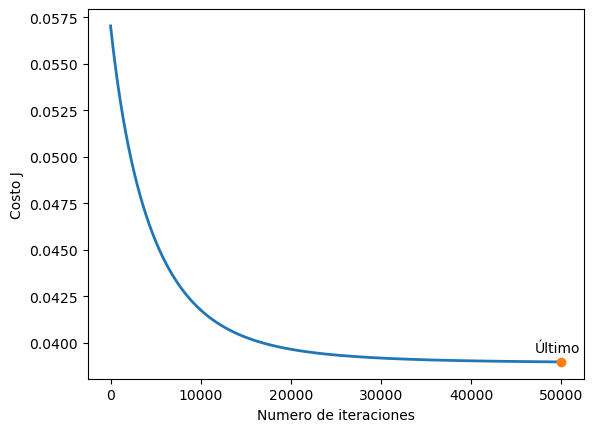

In [97]:
# Grafica la convergencia del costo
Posicion = num_iters
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.plot(Posicion, J_history[Posicion - 1], marker ="o")
pyplot.annotate("Último", (Posicion - 3000, J_history[Posicion - 1] + 0.0005))
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [92]:
# Cargar datos
dataN = np.loadtxt(os.path.join('Datasets', 'waterQuality1.csv'), delimiter=',')
XN = dataN[:, :20]
yN = dataN[:, 20]
mN = y.size
XN = np.concatenate([np.ones((mN, 1)), XN], axis=1)

### Metodo de la Normal

In [93]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [99]:
# Calcula los parametros con la ecuación de la normal
thetaN = normalEqn(XN, yN);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: \n{:s}'.format(str(thetaN)));

# Primera estimación 1
X_arrayN1 = [1,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.71,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05]
priceN1 = np.dot(X_arrayN1, thetaN)   # Se debe cambiar esto
print('1. Con los datos dados el agua es (usando el método de la normal): {:.0f}'.format(priceN1))

# Segunda estimación 1
X_arrayN2 = [1,0.24,8.63,0.04,1.07,0.008,6.19,0.49,0.65,0.9,0.58,0.58,0.093,10.16,1.21,0.003,10.21,5.8,0.05,0.24,0.05]
priceN2 = np.dot(X_arrayN2, thetaN)   # Se debe cambiar esto
print('2. Con los datos dados el agua es (usando el método de la normal): {:.0f}'.format(priceN2))

# Tercera estimación 0
X_arrayN3 = [1,0.07 ,16.07,0.09,0.64,0.1,0.49,0.09,0.36,0.55,0.03,0.005,0.19,0.15,1.86,0.007,10.28,1.97,0.06,0.02,0.04]
priceN3 = np.dot(X_arrayN3, thetaN)   # Se debe cambiar esto
print('3. Con los datos dados el agua es (usando el método de la normal): {:.0f}'.format(priceN3))

# Cuarta estimación 0
X_arrayN4 = [1, 0.35 ,23.18,0.36,3.4,0.08,6.54,0.39, 0.02 ,0.67,0.68,0.68,0.105,5.53,1.42,0.003,47.78,6.25,0.04,0.18,0.01]
priceN4 = np.dot(X_arrayN4, thetaN)   # Se debe cambiar esto
print('4. Con los datos dados el agua es (usando el método de la normal): {:.0f}'.format(priceN4))

# Quinta estimación 0
X_arrayN5 = [1, 2.8, 32.5, 0.01, 2, 0.005, 4, 0.1, 1.3, 1.5, 0, 0, 0.015, 10, 1, 0.002, 56, 5, 0.5, 0.1, 0.3]
priceN5 = np.dot(X_arrayN5, thetaN)   # Se debe cambiar esto
print('5. Con los datos dados el agua es (usando el método de la normal): {:.0f}'.format(priceN5))

# Sexta estimación 1
X_arrayN6 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
priceN6 = np.dot(X_arrayN6, thetaN)   # Se debe cambiar esto
print('6. Con los datos dados el agua es (usando el método de la normal): {:.0f}'.format(priceN6))

Theta calculado a partir de la ecuación de la normal: 
[ 3.29250612e-01  8.72431896e-02 -1.65880320e-03 -2.25609308e-01
  8.99539465e-03 -1.31137325e+00  1.85687871e-02  1.25284892e-01
 -3.17908205e-02  8.59860104e-03  7.43932219e-02 -9.48974643e-02
 -1.30394830e-01 -3.57664359e-03 -2.40922905e-02 -3.03701602e+00
 -2.27616495e-03 -3.83213433e-03 -3.65487449e-01 -9.44982971e-02
 -8.84596787e-01]
1. Con los datos dados el agua es (usando el método de la normal): 0
2. Con los datos dados el agua es (usando el método de la normal): 0
3. Con los datos dados el agua es (usando el método de la normal): -0
4. Con los datos dados el agua es (usando el método de la normal): 0
5. Con los datos dados el agua es (usando el método de la normal): -0
6. Con los datos dados el agua es (usando el método de la normal): 0


### Detalles
Segun las pruebas que realice con los datos extraido del dataset de https://www.kaggle.com/datasets/mssmartypants/water-quality, modificando el coeficiente de aprendizaje, variando la cantidad de iteraciones los resultados no son muy satisfactorios ya que deberian de salir 0 o 1 dependiendo si los valores dados son aceptables para el consumo del agua con los elementos que contienen, 0 es no aceptable y 1 aceptable.